In [1]:
#generate discrete exponential distribution

In [2]:
#data structure:
#state: 4*4 array, each element is the current state of the "perception", -1 or 1
#count: 4*4 array, the number of steps after the last swtich
#run for 1e5 samples
#lamda = 0.02 in exp distribution

In [3]:
import numpy.random as random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#for each array, the switching period follows exponential distribution
interv_arr = []

for i in range(16):
    interv_arr_i = np.array([])
    while np.sum(np.round(interv_arr_i))<4.02e5:
        length = len(interv_arr_i)+1
        interv_arr_i = random.exponential(100,(length,))
    interv_arr.append(np.round(interv_arr_i))

In [5]:
state_list=[]
for arr in interv_arr:
    state_list_i = int(arr[0])*[random.randint(1,3)*2-3]
    for j in range(1,len(arr)):
        state_list_i = state_list_i+int(arr[j])*[-state_list_i[-1]]
    state_list_i = state_list_i[:int(4e5)]
    state_list.append(state_list_i)
state_array = np.array(state_list)

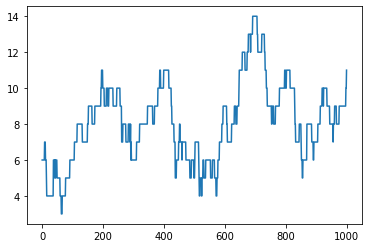

In [6]:
state_sum = np.sum((state_array+1)/2,axis=0)
plt.plot(state_sum[:1000])

In [7]:
def domi_period_count(state_list_input,dim = 4):
    cross_list = []
    #element in cross list: (index,cross_type)
    #cross type = 1: upper bound going up
    #cross type = 2: lower bound going down
    for i in range(1,len(state_list_input)):
        if state_list_input[i-1]>dim**2/3 and state_list_input[i]<dim**2/3:
            cross_list.append((i,2))
        elif state_list_input[i-1]<2*dim**2/3 and state_list_input[i]>2*dim**2/3:
            cross_list.append((i,1))
    switch_list = [cross_list[0]]
    cross = cross_list[0][1]
    for i in range(1,len(cross_list)):
        if cross_list[i][1] != cross:
            cross = cross_list[i][1]
            switch_list.append(cross_list[i])
    domi_list =[]
    for i in range(1,len(switch_list)):
        domi_list.append(switch_list[i][0]-switch_list[i-1][0])
    return np.array(domi_list)

(array([119., 206., 199., 153., 133., 101.,  97.,  61.,  51.,  41.,  36.,
         31.,  28.,  19.,  20.,  15.,   9.,   6.,   2.,   9.,   3.,   2.,
          0.,   2.,   3.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          2.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  12.   ,   64.825,  117.65 ,  170.475,  223.3  ,  276.125,
         328.95 ,  381.775,  434.6  ,  487.425,  540.25 ,  593.075,
         645.9  ,  698.725,  751.55 ,  804.375,  857.2  ,  910.025,
         962.85 , 1015.675, 1068.5  , 1121.325, 1174.15 , 1226.975,
        1279.8  , 1332.625, 1385.45 , 1438.275, 1491.1  , 1543.925,
        1596.75 , 1649.575, 1702.4  , 1755.225, 1808.05 , 1860.875,
        1913.7  , 1966.525, 2019.35 , 2072.175, 2125.   ]),
 <BarContainer object of 40 artists>)

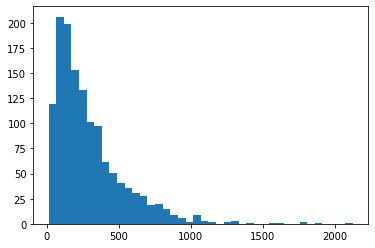

In [8]:
domi_period = np.array(domi_period_count(state_sum,dim = 4))
plt.hist(domi_period,40)

[   1.80331953    2.76832662 1150.827663  ]


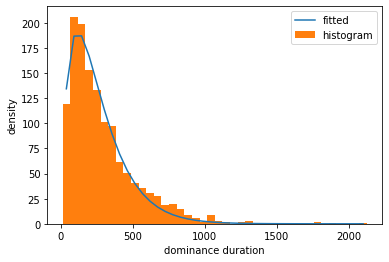

In [9]:
from scipy.optimize import curve_fit
y,bins=np.histogram(domi_period,40)
x = []
for i in range(1,41):
    x.append((bins[i]+bins[i-1])/2)
x=np.array(x)

def gamma(x,a,b,c):
    return c*np.exp(-b*x)*x**(a-1)

popt,pcov = curve_fit(gamma,x/400,y)

print(popt)

plt.plot(x,gamma(x/400,popt[0],popt[1],popt[2]))
plt.hist(domi_period,40)
plt.xlabel('dominance duration')
plt.ylabel('density')
plt.legend(['fitted','histogram'])

In [10]:
#conclusion: if the switching of individual nodes do follow exponential distribution, than the dominance period will
#be a Gamma distribution (some analytical solution may follow)

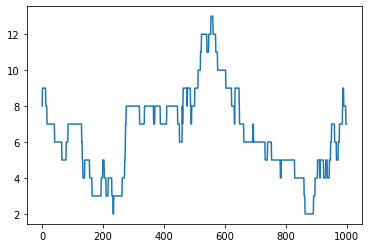

In [11]:
#second simulation: assume switch probability of 0.01 in every step, what is the dominance period distribution
#starting state: 4*4 random 1 and -1
state_ind_flip = random.randint(1,3,(4,4))*2-3
state_list = []
state_list.append((np.sum(state_ind_flip)+16)/2)
for i in range(int(4e5)):
    for j in range(4):
        for k in range(4):
            if random.random()<0.005:
                state_ind_flip[j][k] = -state_ind_flip[j][k]
    state_list.append((np.sum(state_ind_flip+1))/2)

state_array = np.array(state_list)
plt.plot(state_array[2000:3000])

In [12]:
print(np.max(state_array))

15.0


(array([186., 181., 113.,  75.,  57.,  40.,  17.,   6.,  10.,   4.,   3.,
          2.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([  29.  ,  242.15,  455.3 ,  668.45,  881.6 , 1094.75, 1307.9 ,
        1521.05, 1734.2 , 1947.35, 2160.5 , 2373.65, 2586.8 , 2799.95,
        3013.1 , 3226.25, 3439.4 , 3652.55, 3865.7 , 4078.85, 4292.  ]),
 <BarContainer object of 20 artists>)

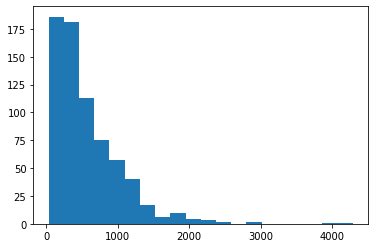

In [13]:
domi_period = np.array(domi_period_count(state_array,dim = 4))
plt.hist(domi_period,20)

[  1.60835607   1.2152387  280.39343743]


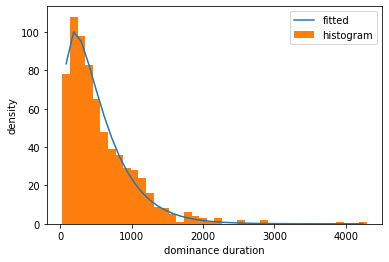

In [14]:
from scipy.optimize import curve_fit
y,bins=np.histogram(domi_period,40)
x = []
for i in range(1,41):
    x.append((bins[i]+bins[i-1])/2)
x=np.array(x)

def gamma(x,a,b,c):
    return c*np.exp(-b*x)*x**(a-1)

popt,pcov = curve_fit(gamma,x/400,y)

print(popt)

plt.plot(x,gamma(x/400,popt[0],popt[1],popt[2]))
plt.hist(domi_period,40)
plt.xlabel('dominance duration')
plt.ylabel('density')
plt.legend(['fitted','histogram'])

In [15]:
#Markov chain result agrees well with the Gamma distribution!